# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
# Domain: Banking
# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
# Attribute Information:
1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer(in dollars 000)
5. ZIP Code : Home Address ZIP code.
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month (in dollars 000)
8. Education : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage : Value of house mortgage if any. (in dollars 000)
10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
11. Securities Account : Does the customer have a securities account with the bank?
12. CD Account : Does the customer have a certificate of deposit (CD)account with the bank?
13. Online : Does the customer use internet banking facilities?
14. Credit card : Does the customer use a credit card issued by UniversalBank?

# Learning Outcomes:

1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using a classification model
4. Model evaluation

# Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.
Steps and tasks:
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings (15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

# References:
Data analytics use cases in Banking
Machine Learning for Financial Marketing

In [91]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#read the data from excel
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [93]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [94]:
#na value check
bank_df.isna().apply(pd.value_counts)   

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# No non numeric value identified

In [95]:
#null value check
bank_df.isnull().apply(pd.value_counts)  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# No Null value identified

In [96]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# ID and Zip Code columns are not relevant for our analysis. Hence it can be removed in next step


In [97]:
#dropping ID & ZIP Code column
bank_df = bank_df.drop(labels = ["ID","ZIP Code"], axis = 1)

In [98]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# from our problem statement we identify that personal loan column will be our y variable for test and prediction and it is categorical. Rest other variables can be analysed in accordance to personal loan by univariate/bivariate & multivariate analysis visually and confirm our theory

# Univariate Analysis

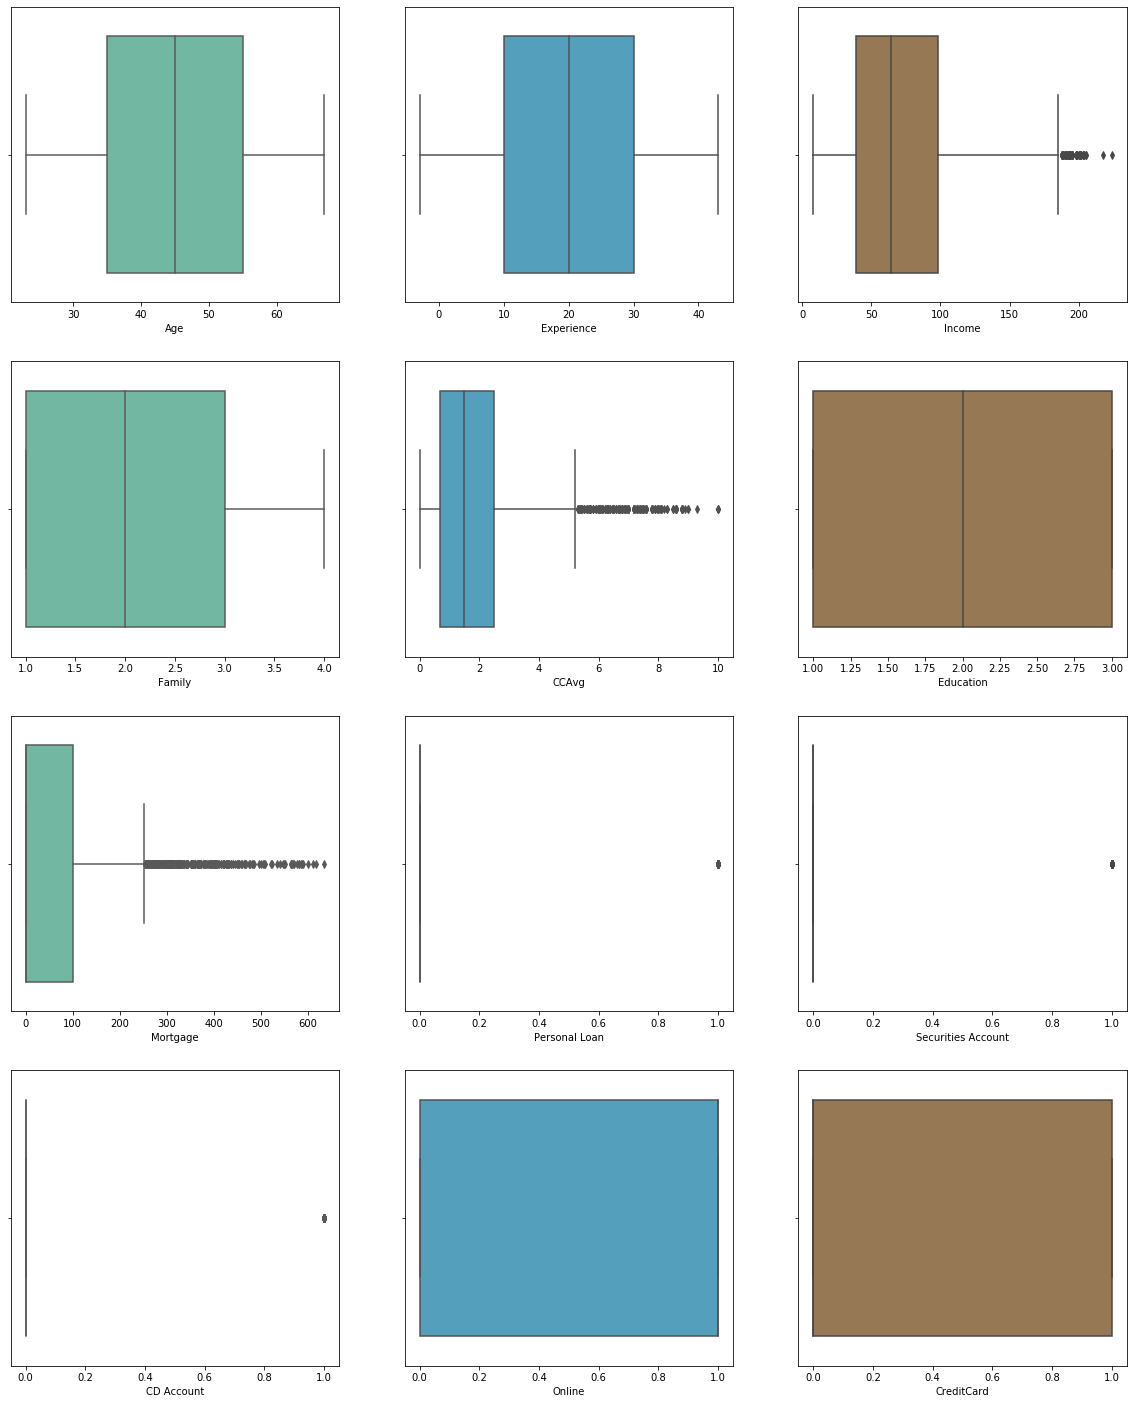

In [99]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.boxplot(data=bank_df,x='Age',palette='BuGn_r')
plt.subplot(4,3,2)
sns.boxplot(data=bank_df,x='Experience',palette='GnBu_d')
plt.subplot(4,3,3)
sns.boxplot(data=bank_df,x='Income',palette='cubehelix')
plt.subplot(4,3,4)
sns.boxplot(data=bank_df,x='Family',palette='BuGn_r')
plt.subplot(4,3,5)
sns.boxplot(data=bank_df,x='CCAvg',palette='GnBu_d')
plt.subplot(4,3,6)
sns.boxplot(data=bank_df,x='Education',palette='cubehelix')
plt.subplot(4,3,7)
sns.boxplot(data=bank_df,x='Mortgage',palette='BuGn_r')
plt.subplot(4,3,8)
sns.boxplot(data=bank_df,x='Personal Loan',palette='GnBu_d')
plt.subplot(4,3,9)
sns.boxplot(data=bank_df,x='Securities Account',palette='cubehelix')
plt.subplot(4,3,10)
sns.boxplot(data=bank_df,x='CD Account',palette='BuGn_r')
plt.subplot(4,3,11)
sns.boxplot(data=bank_df,x='Online',palette='GnBu_d')
plt.subplot(4,3,12)
sns.boxplot(data=bank_df,x='CreditCard',palette='cubehelix')
plt.show()

1. Age - 75% of the people are between mid 30's and mid 50's. 
2. Experience - 75% of the people are having experience between 10 and 30. There are few people with negative experience.they probably might be still going to college and not started their professional experience yet. 
3. Income - Income of few people are extreme and are showing as outliers. 
4. Family - Avg family size is 2 and 75% of the family size is 3 or less than 3
5. CCAvg - Credit card spent avg has several outliers. 50% of the people spend between  1000 to 3000 per month.
6. Mortgage - this has several outliers where 25% of the people are having extreme values of mortgaged amounts. 75% of people are within 0 to 100 as mortgaged amounts.
7. Education, Personal Loan, Securities Account, CDAccount, Online, CrediCard - all these columns are categorical.We can use the hist plot further to fnd the distribution

In [100]:
#we also identify lot of negative values for experience. Hence lets do some analysis for the negative values

In [101]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [102]:
a = bank_df[bank_df['Experience'] < 0 ]
a['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

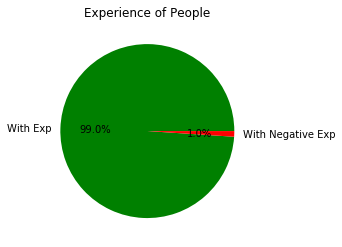

In [103]:
a1 = len(bank_df[bank_df['Experience'] < 0 ])
a1
a2 = len(bank_df) - a1
a2
a3 = [a2,a1]
labels = ['With Exp','With Negative Exp']
colors = ['g','r']
plt.pie(a3,labels = labels,colors = colors,autopct='%.1f%%')
plt.title('Experience of People')
plt.show()

# 1% people are with negative experience.

In [104]:
#applying absolute values for the negative experience
bank_df['Experience'] = bank_df['Experience'].apply(abs)

In [105]:
bank_df[bank_df['Experience'] < 0 ]


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# all negative experiences are replaced by their absolute values

In [106]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [107]:
bank_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [108]:
bank_df[['Income','Mortgage']] = bank_df[['Income','Mortgage']].astype(float)

In [109]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null float64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 468.8 KB


In [110]:
#finding the correlation of the variables
corr = bank_df.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


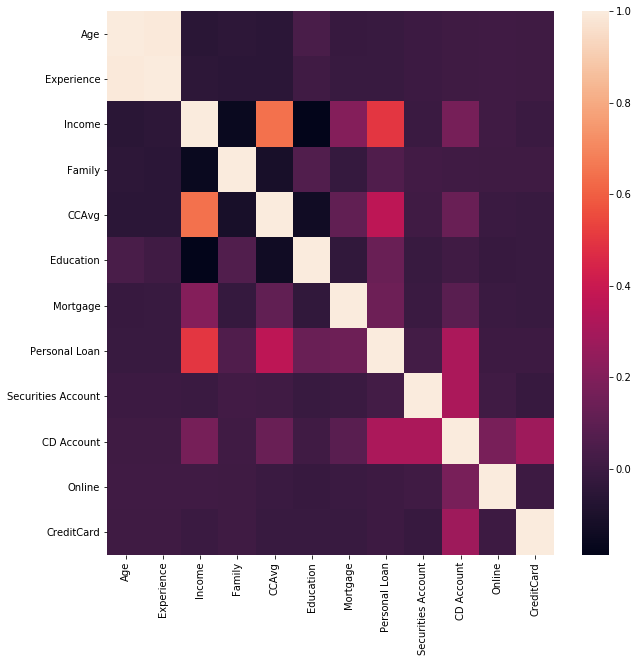

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

1. Lighter shade indicates high correlation and darker shade incidates lower correlation 
2. high correlation b/w Age and experience, personal loan and income/CCAvg

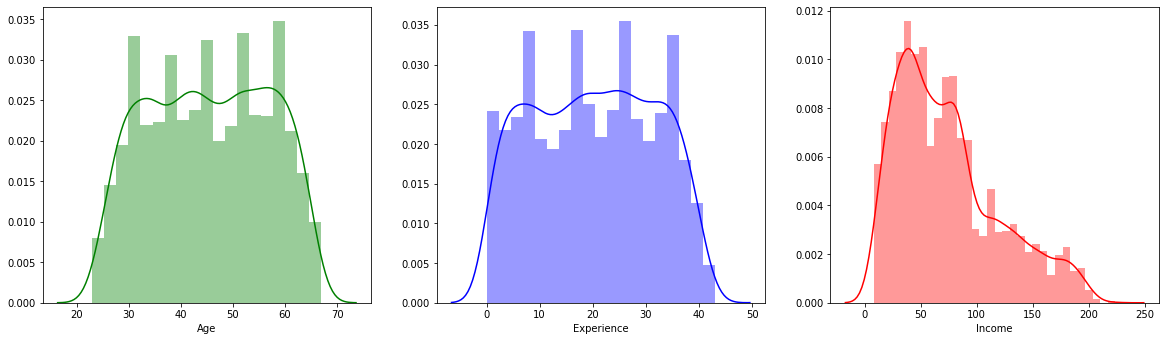

In [112]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.distplot(bank_df['Age'],kde = True,color='g')
plt.subplot(4,3,2)
sns.distplot(bank_df['Experience'],kde = True,color='b')
plt.subplot(4,3,3)
sns.distplot(bank_df['Income'],kde = True,color='r')
plt.show()


1. Age and experience are partially normal distributed 
2. Income is skewed and indicates people with high income are less

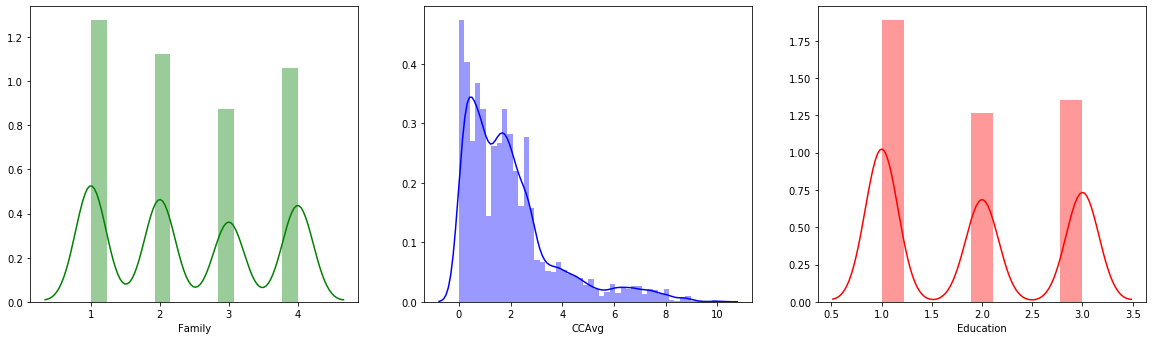

In [113]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.distplot(bank_df['Family'],kde = True,color='g')
plt.subplot(4,3,2)
sns.distplot(bank_df['CCAvg'],kde = True,color='b')
plt.subplot(4,3,3)
sns.distplot(bank_df['Education'],kde = True,color='r')
plt.show()


1. Family and Education are categorical and nothing to much to explore from histogram
2. CCAvg which is Avg. spending on credit cards per month (in dollars 000) is again skewed.
   Majority of the people spend is between 0 to 2500 dollars

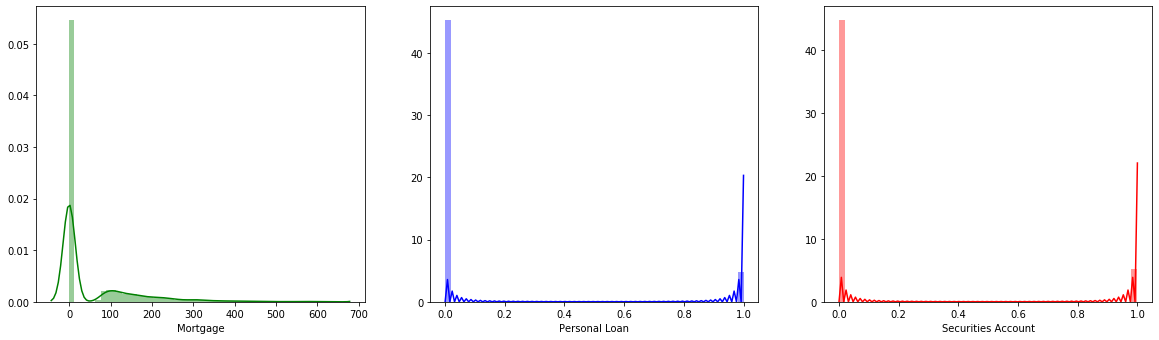

In [114]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.distplot(bank_df['Mortgage'],kde = True,color='g')
plt.subplot(4,3,2)
sns.distplot(bank_df['Personal Loan'],kde = True,color='b')
plt.subplot(4,3,3)
sns.distplot(bank_df['Securities Account'],kde = True,color='r')
plt.show()


1. More than 50% percent of people have not taken mortgage and this data is highly skewed
2. Personal Loan and Securities Account are categorical data

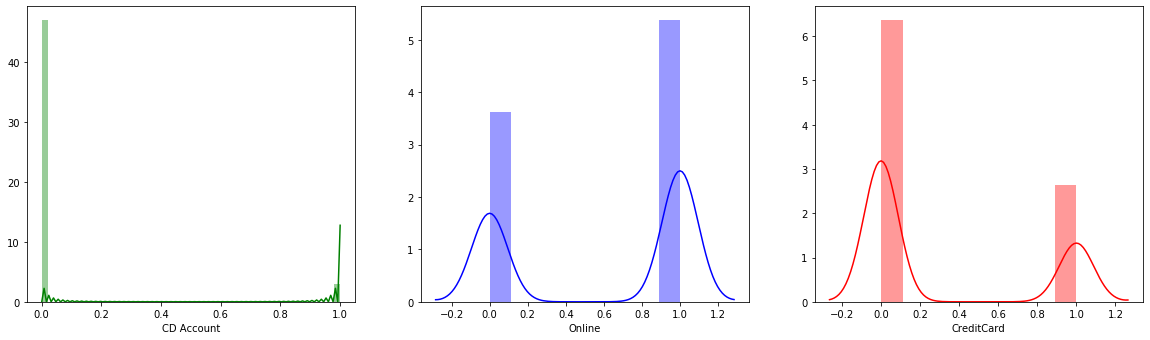

In [27]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.distplot(bank_df['CD Account'],kde = True,color='g')
plt.subplot(4,3,2)
sns.distplot(bank_df['Online'],kde = True,color='b')
plt.subplot(4,3,3)
sns.distplot(bank_df['CreditCard'],kde = True,color='r')
plt.show()


All the above 3 are categorical and nothing much to infer from hist plot

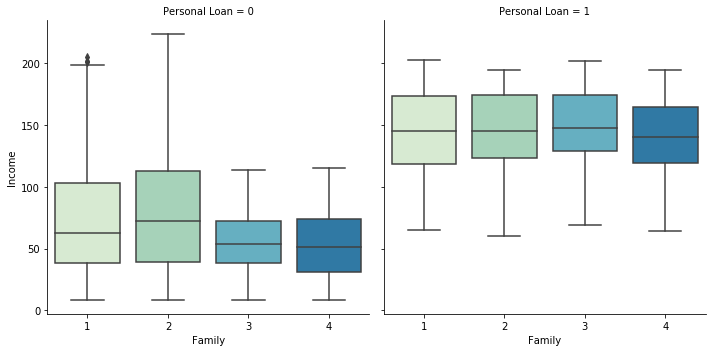

In [28]:
#trying to box plot income range for family by grouping Personal loan 
g = sns.FacetGrid(bank_df, col='Personal Loan', palette="Set1", height = 5, aspect = 1)
g = (g.map(sns.boxplot, "Family", "Income", palette = 'GnBu',order = [1,2,3,4]))
plt.show()

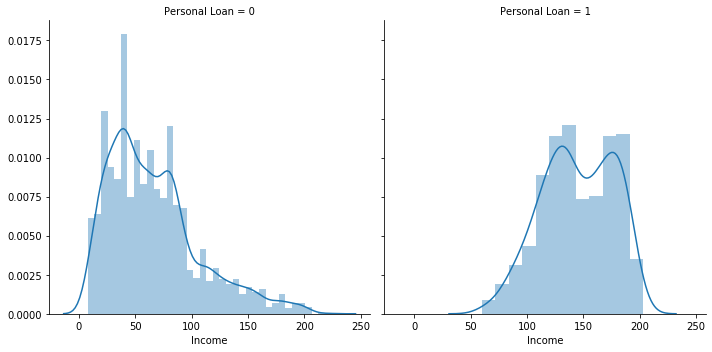

In [118]:
g = sns.FacetGrid(bank_df, col='Personal Loan', palette="Set1", height = 5, aspect = 1)
g = (g.map(sns.distplot, "Income"))
plt.show()

With this we can infer that people with higher range of income are the ones who are accepting loans

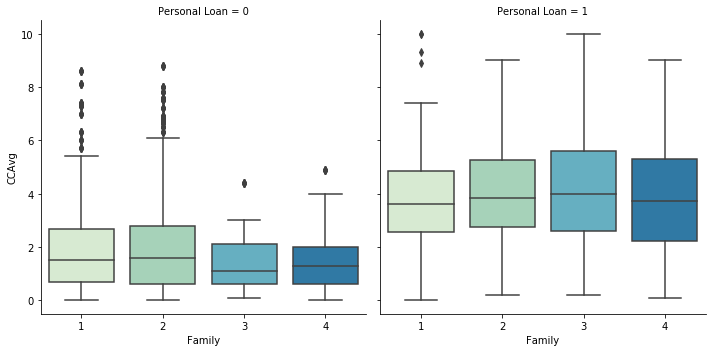

In [29]:
g = sns.FacetGrid(bank_df, col='Personal Loan', palette="Set1", height = 5, aspect = 1)
g = (g.map(sns.boxplot, "Family", "CCAvg", palette = 'GnBu',order = [1,2,3,4]))
plt.show()

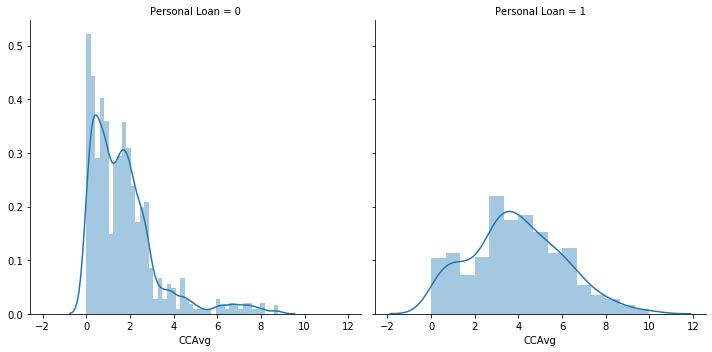

In [30]:
g = sns.FacetGrid(bank_df, col='Personal Loan', palette="Set1", height = 5, aspect = 1)
g = (g.map(sns.distplot, "CCAvg"))
plt.show()

With this we can infer that people with higher credit card spend are the ones who are accepting loans

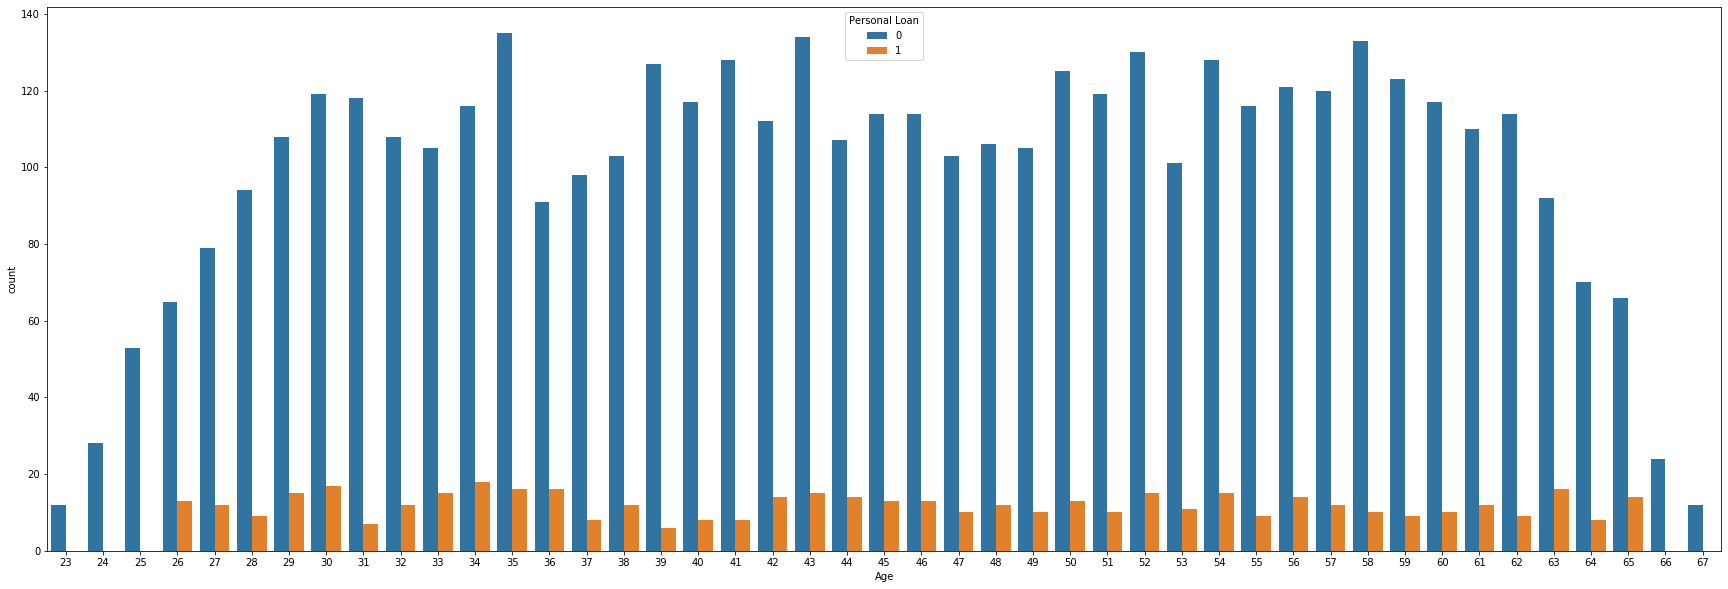

In [119]:
#trying to see how age is a factor for Personal loan
fig, ax = plt.subplots(figsize=(30,10))
ax=sns.countplot(data = bank_df, x= 'Age', hue = 'Personal Loan', ) 
plt.show()

People of less age (< 26) and people of higher age (>66) are not interested to take loans



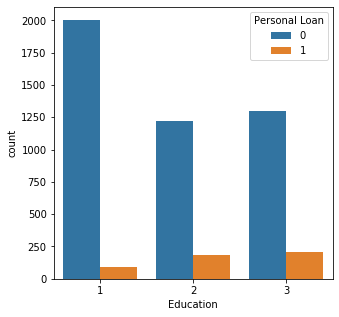

In [122]:
#trying to see how education is a factor for Personal Loan
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.countplot(data = bank_df, x= 'Education', hue = 'Personal Loan', ) 
plt.show()

People who are graduate or Advanced/professional take more loans than undergraduates

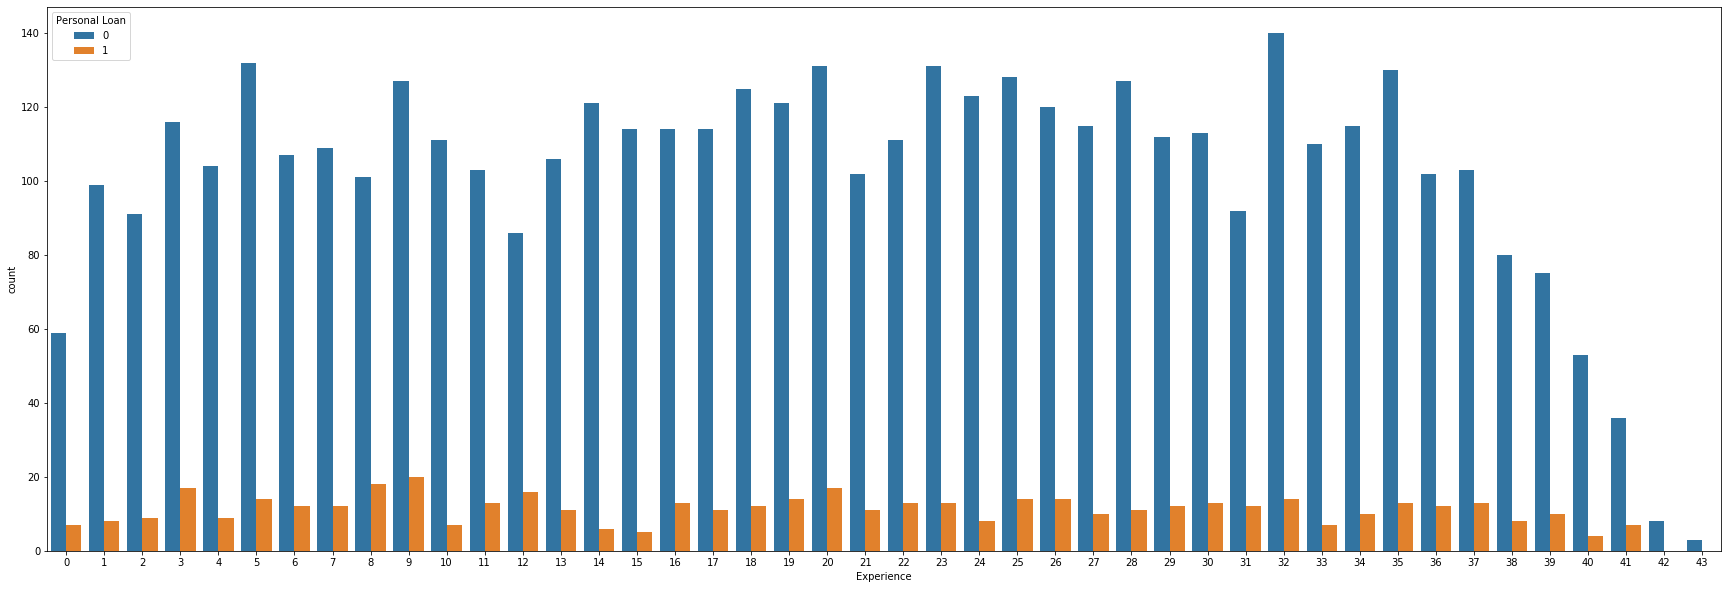

In [33]:
#trying to see how experience is a factor for personal loan
fig, ax = plt.subplots(figsize=(30,10))
ax=sns.countplot(data = bank_df, x= 'Experience', hue = 'Personal Loan', ) 
plt.show()

People of all experience are willing to take personal loan except who are greater 42 years of experience 

In [123]:
#pairplot for the variables by grouping Personal Loan
pairplot_df = bank_df.drop(['CreditCard','Online','CD Account','Securities Account'], axis = 1)

C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x360 with 0 Axes>

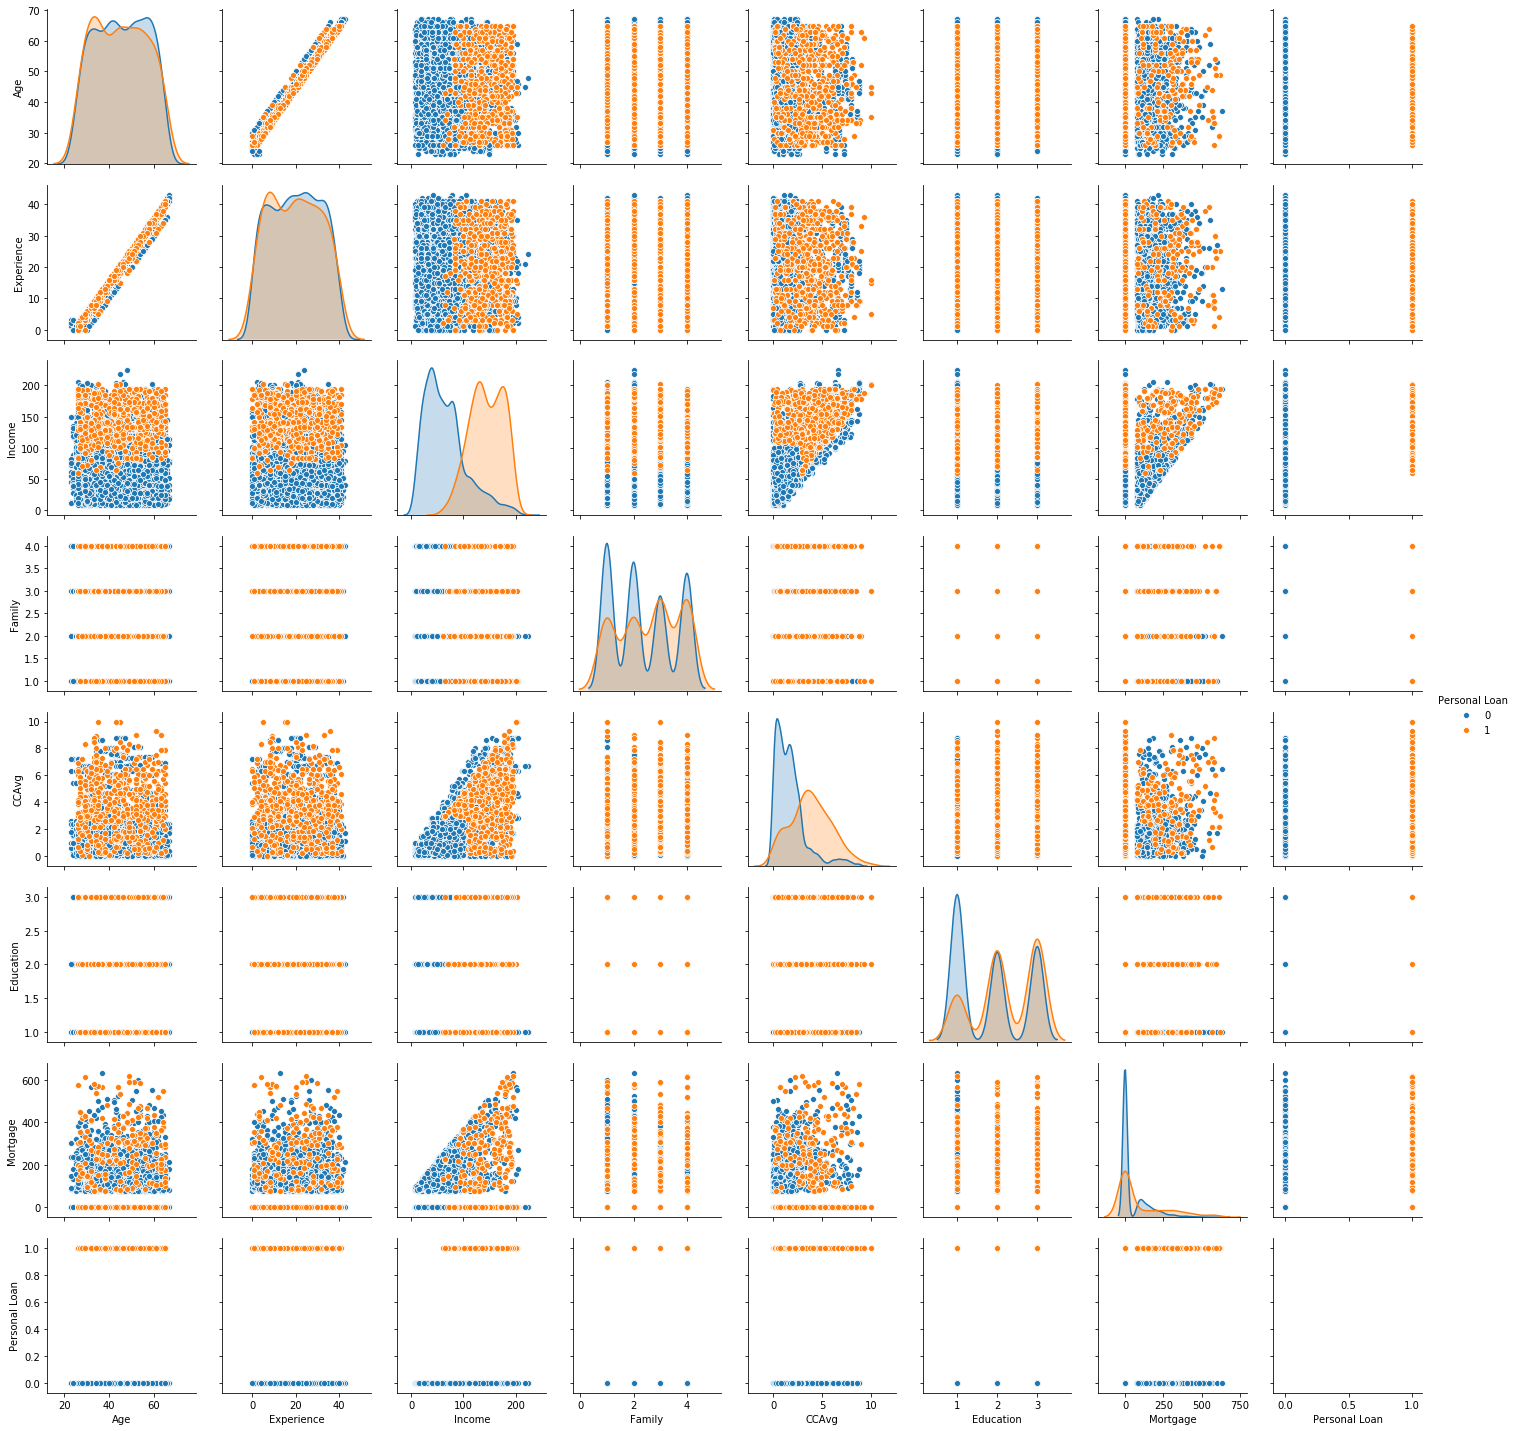

In [35]:
plt.figure(figsize=[6,5])
sns.pairplot(pairplot_df, hue = 'Personal Loan',)
plt.show()

1. based on this can see age and experience
2. rest other variables doesnt have much correlation and many are scattered much 

With the above analysis we can infer that Personal loan is influenced by age / experience / family members and education level

# Split the data into training and test set in the ratio of 70:30 respectively

In [124]:
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

In [125]:
copy_bank_df = bank_df
copy_bank_df[['Family','Education','Personal Loan']] = copy_bank_df[['Family','Education','Personal Loan']].astype('category')
copy_bank_df.info()
copy_bank_df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null float64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null float64
Personal Loan         5000 non-null category
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(3), float64(3), int64(6)
memory usage: 366.7 KB


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


In [126]:

X = copy_bank_df.drop(['Personal Loan'],axis = 1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1


In [127]:
y = copy_bank_df['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [128]:
#splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Using KNN Classifier for prediction

In [129]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )

In [130]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [131]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
from sklearn import metrics
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predicted_labels)))


Model Accuracy: 0.9113


In [132]:
scores =[]
for k in range(1,20):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

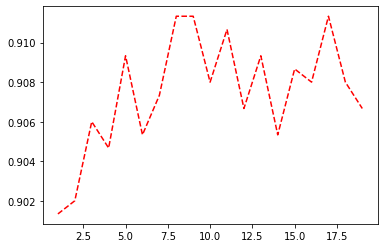

In [133]:
plt.plot(range(1,20),scores,'r--')
plt.show()

In [134]:
scores

[0.9013333333333333,
 0.902,
 0.906,
 0.9046666666666666,
 0.9093333333333333,
 0.9053333333333333,
 0.9073333333333333,
 0.9113333333333333,
 0.9113333333333333,
 0.908,
 0.9106666666666666,
 0.9066666666666666,
 0.9093333333333333,
 0.9053333333333333,
 0.9086666666666666,
 0.908,
 0.9113333333333333,
 0.908,
 0.9066666666666666]

Confusion Matrix


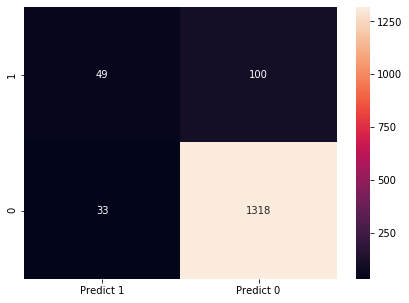

In [136]:
print("Confusion Matrix")
Knncm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
Knncm
df_cm = pd.DataFrame(Knncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for KNN

True Positives (TP): we correctly predicted that they will take loan 49

True Negatives (TN): we correctly predicted that they wont't take loan 1318

False Negatives (FN): we incorrectly predicted that they will take loan 33

False Positive (FP): we incorrectly predicted that thye wont't take loan 100

In [139]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.33      0.42       149
           0       0.93      0.98      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.76      0.65      0.69      1500
weighted avg       0.90      0.91      0.90      1500



# from KNN classification we can infer that 
Max Accuracy achievable is 91.13% for a k value 9. 
Precision score - 60% and recall - 33% for predicting a person would take loan 
indicates that this model still can be improved. With this model bank will spend less budget since wrong classification of loan buyers is less


# Using Gaussian algorithm from Naive Bayes for prediction

In [140]:
# using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# create the model
GNB = GaussianNB()

GNB.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
GNB_predict = GNB.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, GNB_predict)))


Model Accuracy: 0.8747


Confusion Matrix


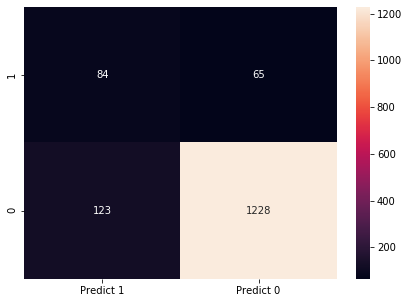

In [142]:
print("Confusion Matrix")
Ncm=metrics.confusion_matrix(y_test, GNB_predict, labels=[1, 0])
Ncm
df_Ncm = pd.DataFrame(Ncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_Ncm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Gausian Naive Bayes
True Positives (TP): we correctly predicted that they will take loan 84

True Negatives (TN): we correctly predicted that they wont't take loan 1228

False Negatives (FN): we incorrectly predicted that they will take loan 123

False Positive (FP): we incorrectly predicted that they wont't take loan 65

In [143]:
print("Classification Report")
print(metrics.classification_report(y_test, GNB_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



# from Gausian Naive Bayes classification we can infer that
Max Accuracy achievable is 87.47%. Precision score - 41% and recall - 56% for predicting a person would take loan indicates that this model still need to be improved and bank will spend more budget in wrong classification of loan buyers

# Using Logistic Regression for Prediction

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
#Build the logistic regression model
logisticmodel = LogisticRegression( solver = "liblinear")

In [146]:
logisticmodel.fit(X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
logistic_predict = logisticmodel.predict(X_test)

In [149]:
# Use score method to get accuracy of model
score = logisticmodel.score(X_test, y_test)
print(score)

0.9453333333333334


In [150]:
score = logisticmodel.score(X_train, y_train)
print(score)

0.9514285714285714


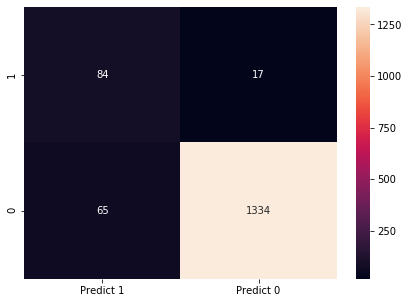

In [151]:
logcm = metrics.confusion_matrix(logistic_predict,y_test, labels=[1,0])
dflog_cm = pd.DataFrame(logcm, index = [i for i in ["1","0"]], 
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(dflog_cm, annot=True, fmt = 'g')
plt.show()

# The confusion matrix for Logistic Regression
True Positives (TP): we correctly predicted that they will take loan 84

True Negatives (TN): we correctly predicted that they wont't take loan 1334

False Negatives (FN): we incorrectly predicted that they will take loan 65

False Positive (FP): we incorrectly predicted that they wont't take loan 17

In [152]:
print("Classification Report")
print(metrics.classification_report(y_test, logistic_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.56      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



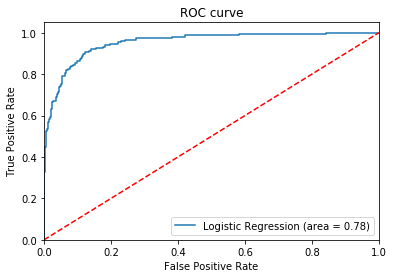

In [80]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logistic_roc_auc = roc_auc_score(y_test, logisticmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
auc_score = metrics.roc_auc_score(y_test, logisticmodel.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.95

# from Logistic Regression classification we can infer that
Max Accuracy achievable is 94.53%. Precision score - 83% and recall - 56% for predicting a person would take loan indicates that this model is best among other models and bank can spend less budget and identify the loan buyers. 
ROC score is also 95% which indicates that this model is better one for the bank to predict and spend its budget